# Glass Identification Dataset

### Problem Statement:

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

### Attribute Information-

id number: 1 to 214 RI: refractive index Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) Mg: Magnesium Al: Aluminum Si: Silicon K: Potassium Ca: Calcium Ba: Barium Fe: Iron Type of glass: (class attribute) 1- building_windows_float_processed 2- building_windows_non_float_processed 3- vehicle_windows_float_processed 4- vehicle_windows_non_float_processed (none in this database) 5- containers 6- tableware 7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).

### Predict : Type of glass

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [12]:
df=pd.read_csv("glass.csv",header = None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [13]:
df.columns = ['ID','Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
df

,ID,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [30]:
names = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

In [31]:
df.describe()

,ID,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   Ri      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [33]:
df.dtypes

ID        int64
Ri      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [34]:
df.isnull().sum()

ID      0
Ri      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [35]:
# checking for duplicate values
df.duplicated().sum()

0

In [36]:
# checking for empty spaces
df.isin(['NAN','NA','N/A','-',' ','?',np.nan]).sum().any()

False

In [37]:
df.nunique()

ID      214
Ri      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [22]:
glass_Y = df['Type']
glass_Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [23]:
#Separating the data into dependent and independent variables.
glass_X = df.drop('Type', axis = 1)
glass_X.head()

,ID,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [24]:
glass_Y.value_counts()


2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## Visualisation

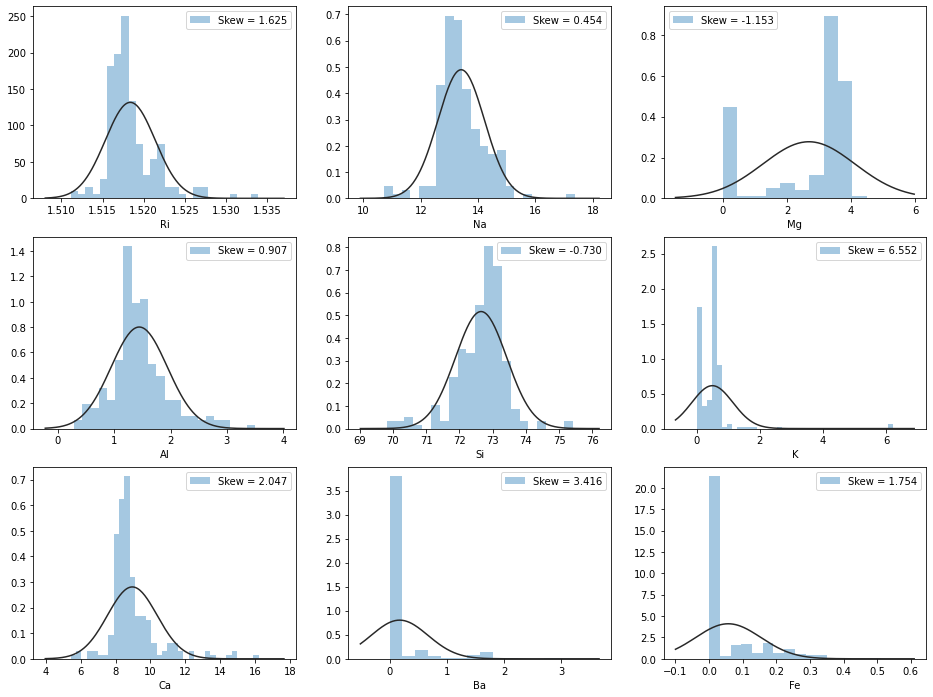

In [27]:
#plotting a histogram of each independent feature for visualization
cols = ['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

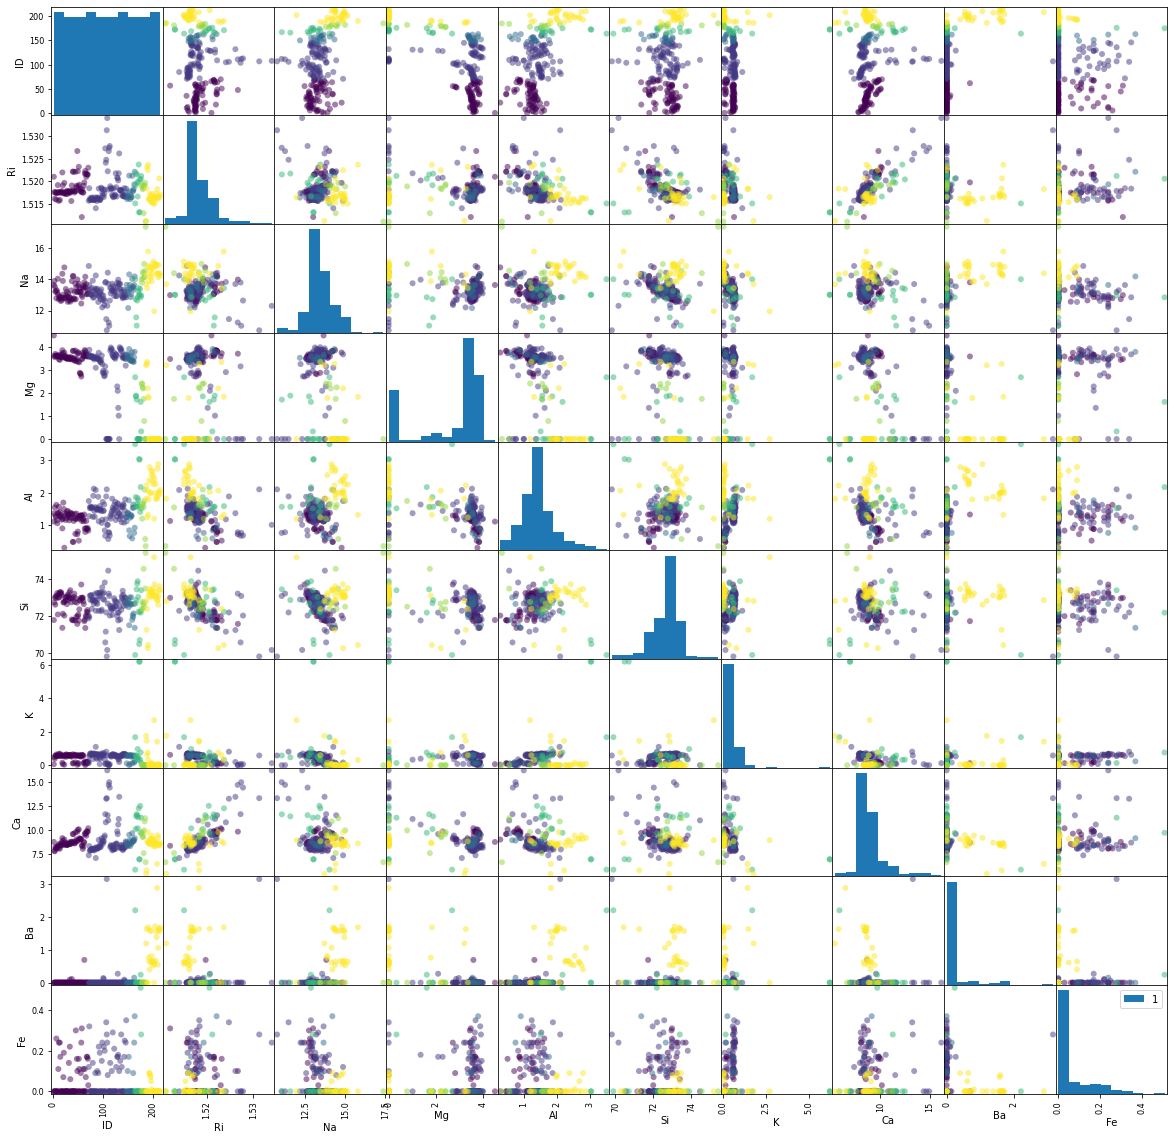

In [29]:
#Scatter Matrix
pd.plotting.scatter_matrix(df.iloc[:,:-1], c=df.iloc[:,-1], figsize=(20, 20), marker='o')
plt.legend(df["Type"].unique())
plt.show()

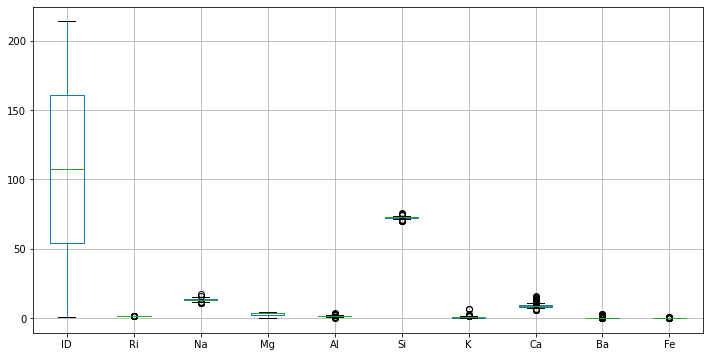

In [38]:
# Checking for outliers
df.iloc[:,:-1].boxplot(figsize=(12,6))
plt.show()

In [40]:
#Outlier Treatment
numerical_features=['Ri', 'Na', 'Mg', 'Al','Si','K','Ca','Ba','Fe']
for cols in numerical_features:
    Q1 = glass_X[cols].quantile(0.25)
    Q3 = glass_X[cols].quantile(0.75)
    IQR = Q3 - Q1  
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR

    glass_X[cols] = (np.where(glass_X[cols] >= Upper_Whisker, Upper_Whisker, glass_X[cols]))
    glass_X[cols] = (np.where(glass_X[cols] <= Lower_Whisker, Lower_Whisker, glass_X[cols]))
#Checking if the outliers are treated

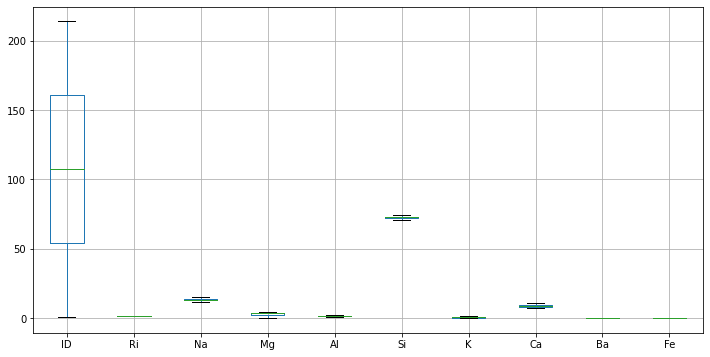

In [41]:
#Checking if the outliers are treated
glass_X.boxplot(figsize=(12,6))
plt.show()

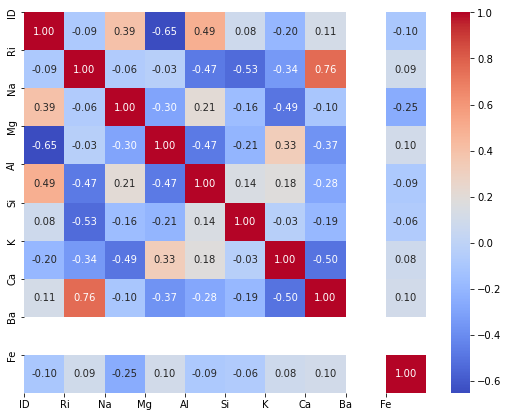

In [42]:
#Checking for correlation between independent variables
corr = glass_X.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(9, 7))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()


## Principal Component Analysis

In [43]:
# Reducing the dimensionality of our dataset using PCA
pca = PCA()
pca.fit(glass_X)

PCA()

In [44]:
pca.n_components_


10

In [46]:
#To find the variance explained by different components
DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,11)], columns=["Explained Variance"]).T


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
Explained Variance,3835.19,1.43,0.71,0.55,0.28,0.07,0.03,0.01,0.0,0.0


In [47]:
pca = PCA(n_components = 3)
glass_X_pca = pca.fit_transform(glass_X)

In [48]:
pca.components_ 

array([[ 9.99866181e-01, -3.28665468e-06,  4.72882208e-03,
        -1.51520955e-02,  3.38342369e-03,  8.36378329e-04,
        -9.83156708e-04,  1.59308866e-03,  0.00000000e+00,
        -1.41042739e-04],
       [-1.40759263e-02,  6.90813035e-04, -7.96748749e-03,
        -8.66464614e-01,  1.50125993e-02,  7.67350164e-02,
        -1.01418330e-01,  4.82263064e-01, -0.00000000e+00,
         3.02106652e-05],
       [-6.27802048e-03, -2.23369521e-03,  1.30711712e-01,
        -3.73957067e-01,  2.50729472e-01,  4.80812893e-01,
         9.01185846e-02, -7.35252387e-01,  0.00000000e+00,
        -1.61993724e-02]])

In [49]:
df = pd.DataFrame(pca.components_, columns=list(glass_X.columns))
df.head()

,ID,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.999866,-0.000003,0.004729,-0.015152,0.003383,0.000836,-0.000983,0.001593,0.0,-0.000141
1,-0.014076,0.000691,-0.007967,-0.866465,0.015013,0.076735,-0.101418,0.482263,-0.0,0.000030
2,-0.006278,-0.002234,0.130712,-0.373957,0.250729,0.480813,0.090119,-0.735252,0.0,-0.016199


In [50]:
pca.explained_variance_ratio_ 


array([9.99196316e-01, 3.73600669e-04, 1.86037412e-04])

In [51]:
print(sum(pca.explained_variance_ratio_))


0.9997559539445166


In [52]:
X_train, X_test, y_train, y_test = train_test_split(glass_X_pca, glass_Y, test_size=1/5, random_state=5)


## K Nearest Neighbours Classifier 

In [53]:
test_scores = []
train_scores = []

# we will be testing 14 different values for k, starting with 1 and ending before 15
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [54]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1, 3, 5, 7, 9, 11, 13]


In [55]:
# This score comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 100.0 % and k = [2, 4]


In [56]:
y_test.value_counts()


1    16
2    15
7     7
3     2
6     2
5     1
Name: Type, dtype: int64

### Random Forest Classifier

[[16  0  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  1  1  0]
 [ 0  0  0  0  1  6]]
AxesSubplot(0.125,0.125;0.62x0.755)
Accuracy:  95.34883720930233 %


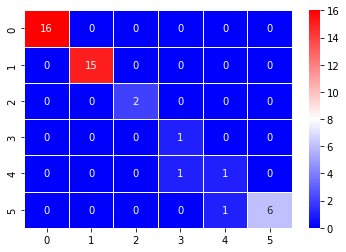

In [57]:
clf=RandomForestClassifier(random_state = 45)
clf.fit(X_train,y_train)
y_preds=clf.predict(X_test)
mat=confusion_matrix(y_test,y_preds)
print(mat)
print(sns.heatmap(mat,annot=True,cmap='bwr',linewidths=.5))
acc=accuracy_score(y_test,y_preds)
print("Accuracy: ",acc*100,"%")

In [58]:
#Improving the accuracy score by normalizing the data
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(glass_X)
X_norm = pd.DataFrame(X_minmax)
# a peek at the new normalized features
X_norm.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.800759,0.574591,1.000000,0.323864,0.220201,0.044734,0.511729,0.0,0.0
1,0.004695,0.478178,0.642711,0.801782,0.471591,0.514319,0.357875,0.265080,0.0,0.0
2,0.009390,0.342505,0.544619,0.790646,0.573864,0.594814,0.290774,0.251676,0.0,0.0
3,0.014085,0.482922,0.457425,0.821826,0.431818,0.477167,0.424977,0.369638,0.0,0.0
4,0.018779,0.460152,0.473774,0.806236,0.403409,0.622678,0.410065,0.329424,0.0,0.0


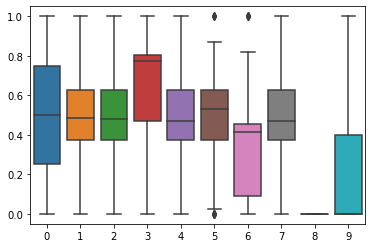

In [59]:
#now all of our values fall between 0 and 1
ax = sns.boxplot(data=X_norm)

# Smote

[Text(0.5, 0, 'Type of Glass'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'After SMOTE')]

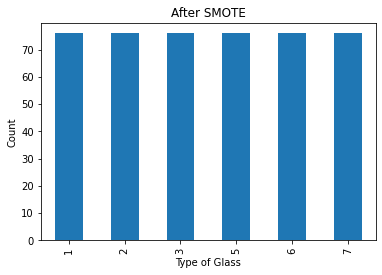

In [62]:
#As we can see, a couple of our types of glass have many more values than the rest. SMOTE will fill in the difference.
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(X_norm, glass_Y)
y_res_df = pd.DataFrame(y_res)
ax = y_res_df.Type.value_counts().plot(kind="bar")
ax.set(xlabel="Type of Glass", ylabel="Count", title = "After SMOTE")

In [63]:
# Reducing the dimensionality of our dataset using PCA
pca = PCA()
pca.fit(x_res)

PCA()

In [64]:
pca.n_components_

10

In [66]:
#To find the variance explained by different components
DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,11)], columns=["Explained Variance"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
Explained Variance,0.21,0.13,0.08,0.06,0.05,0.03,0.02,0.01,0.01,0.0


In [67]:
#Proportion of variance explained by individual components
DataFrame(pca.explained_variance_ratio_.round(2), index = ["P" + str(i) for i in range(1,11)], 
          columns=["Explained Variance Ratio"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
Explained Variance Ratio,0.35,0.21,0.14,0.11,0.09,0.04,0.03,0.01,0.01,0.0


In [68]:
# Since, first three components explain 90% of the total variation in the dataset, we choose them as our Principal Components.
pca = PCA(n_components = 5)
glass_X_pca_smote = pca.fit_transform(x_res)

In [69]:
#Eigenvectors of the 5 Principal Components
pca.components_ 

array([[-0.47112706, -0.00200329, -0.24432985,  0.67064257, -0.27269792,
        -0.13567724,  0.28982072, -0.20346304, -0.        ,  0.22452398],
       [-0.11328099,  0.50740958, -0.10964332, -0.04029917, -0.3710917 ,
        -0.03176216, -0.35138331,  0.60383802,  0.        ,  0.29874536],
       [ 0.10480872, -0.00557694, -0.27757659, -0.28135655,  0.37501003,
        -0.03440287,  0.37649584,  0.03671578, -0.        ,  0.740176  ],
       [-0.04894942, -0.35673101,  0.26657248,  0.05381132, -0.16683805,
         0.46275477, -0.49056828, -0.26518568,  0.        ,  0.49338909],
       [-0.32622929, -0.18583332, -0.52449878, -0.24558278, -0.07888989,
         0.63664134,  0.13538801,  0.17234212, -0.        , -0.25310673]])

In [70]:
#Linear Combination
data = pd.DataFrame(pca.components_, columns=list(x_res.columns))
data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.471127,-0.002003,-0.244330,0.670643,-0.272698,-0.135677,0.289821,-0.203463,-0.0,0.224524
1,-0.113281,0.507410,-0.109643,-0.040299,-0.371092,-0.031762,-0.351383,0.603838,0.0,0.298745
2,0.104809,-0.005577,-0.277577,-0.281357,0.375010,-0.034403,0.376496,0.036716,-0.0,0.740176
3,-0.048949,-0.356731,0.266572,0.053811,-0.166838,0.462755,-0.490568,-0.265186,0.0,0.493389
4,-0.326229,-0.185833,-0.524499,-0.245583,-0.078890,0.636641,0.135388,0.172342,-0.0,-0.253107


In [71]:
#Explained Variance of 5 individual Principal Components
pca.explained_variance_ratio_ 

array([0.35293558, 0.21224448, 0.14325457, 0.10851358, 0.08671481])

In [72]:
print(sum(pca.explained_variance_ratio_))


0.9036630209202684


In [73]:
#Splitting into train and test
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(glass_X_pca_smote, y_res, test_size=1/5, random_state=5)

# K Nearest Neighbours Classifier

In [74]:
test_scores = []
train_scores = []

# we will be testing 14 different values for k, starting with 1 and ending before 15
for i in range(1,15):

    knn_sm = KNeighborsClassifier(i)
    knn_sm.fit(X_train_sm,y_train_sm)
    
    train_scores.append(knn_sm.score(X_train_sm,y_train_sm))
    test_scores.append(knn_sm.score(X_test_sm,y_test_sm))

In [75]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [76]:
# This score comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {}% and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 91.30434782608695% and k = [1]


[[13  0  0  0  0  0]
 [ 1 11  1  0  0  0]
 [ 0  1 13  0  0  0]
 [ 0  0  0 22  0  0]
 [ 0  0  0  0 16  0]
 [ 0  1  0  2  1 10]]
AxesSubplot(0.125,0.125;0.62x0.755)
Accuracy: 92.3913043478261 %


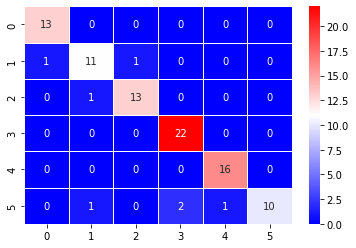

In [77]:
clf_sm=RandomForestClassifier(random_state = 45)
clf_sm.fit(X_train_sm,y_train_sm)
y_preds_sm=clf_sm.predict(X_test_sm)
mat_sm=confusion_matrix(y_test_sm,y_preds_sm)
print(mat_sm)
print(sns.heatmap(mat_sm,annot=True,cmap='bwr',linewidths=.5))
acc_sm=accuracy_score(y_test_sm,y_preds_sm)
print("Accuracy:",acc_sm*100,"%")